In [17]:
import pandas as pd 
import os 
import numpy as np 
import matplotlib.pyplot as plt
import upsetplot
import glob
import collections
import pyupset as pyu
import seaborn as sns
import matplotlib.ticker as ticker
import tarfile


In [7]:
# sample = 'TCGA-AO-A0JM-01A-21R-A056-07'
# background = 'matchedNormals'

In [8]:
path_data = '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v2.5f0752a_conf2_annotFrame_cap0_runs_pya0.17.1/TCGA_Breast_1102/filter_{}.all/commit_6e25db6_{}'.format(sample, background)

In [9]:
#all_paths = glob.glob(path_data + '/G_*tsv')

In [10]:
#all_paths = [path for path in all_paths if 'Uniprot' in path ]

In [11]:
#len(np.unique(all_paths))

84

In [13]:
plot_dir = '/cluster/work/grlab/projects/projects2020_OHSU/plots'
plot_dir = os.path.join(plot_dir, 'upset_plots')
base_plot = 'v2_v2.5f0752a_conf2_BRCA_{}'.format(sample)
os.mkdir(plot_dir)


FileExistsError: [Errno 17] File exists: '/cluster/work/grlab/projects/projects2020_OHSU/plots/upset_plots'

# Helpers



In [24]:
def ohsu_to_eth(path):
    cohort = {'NormalCohortcore_GTEx_': 'Gtexcore', 
             'NormalCohortpaired_': 'Matched', 
             'NormalCohortAll_':'Alls'}
    
    key_to_apply = [k for k in cohort if k in path]
    if key_to_apply: 
        key_to_apply = key_to_apply[0]
        path = path.replace(key_to_apply, '')
        path = path.replace('FiltNormalsC','FiltNormals{}C'.format(cohort[key_to_apply]) )

        path = path.replace('J_', 'G_')

        path = path.replace('CohortLim', '.0CohortLim')
        sample = path.split('_')[1]
        #print(path)
        return path, sample
    else:
        return None, None 

In [25]:
def get_eth_path(base_folder_ETH, name_eth=None, sample=None):
    path_o = None 
    if name_eth is not None: 
        path_list = os.path.join(base_folder_ETH, 'filter_' + sample, '*', name_eth, 'part*')
        path_list = glob.glob(path_list)
        if path_list:
            path_o = path_list[0]
    return path_o 
    

In [26]:
def get_file_pairs(tar_file_OHSU, base_folder_ETH):
    file_pair = {'eth':[], 'ohsu': []}
    with tarfile.open(tar_file_OHSU, "r:*") as tar:
        file_names_OHSU = tar.getnames()

        for name_ohsu in file_names_OHSU:
            name_eth, sample = ohsu_to_eth(name_ohsu)
            eth_path = get_eth_path(base_folder_ETH, name_eth, sample)
            if (eth_path is not None) and os.path.isfile(eth_path):
                file_pair['eth'].append(eth_path) 
                file_pair['ohsu'].append(name_ohsu)
    return file_pair

In [93]:
def collect_for_upset(target_file, kmer_list, result_nested_list):
    for kmer in kmer_list:
        result_nested_list[kmer][target_file] = 1  

# Main Data

In [27]:
tar_file_OHSU = '/cluster/work/grlab/projects/projects2020_OHSU/share_OHUS_PNLL/Aug21_graph_data_current/OHSU_kmer_lists_Nov24.tar.gz'
base_folder_ETH = '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v2.5f0752a_conf2_annotFrame_cap0_runs_pya0.17.1/TCGA_Breast_1102'


In [68]:
file_pair = get_file_pairs(tar_file_OHSU, base_folder_ETH)

In [ ]:
sample = 'TCGA-AO-A0JM-01A-21R-A056-07'
background = 'matchedNormals'

In [80]:
valid_idx = [idx for  idx, eth in enumerate(file_pair['eth'])  if (sample in eth) and (background in eth)]
len(valid_idx)

48

In [127]:
myplot_collect = collections.defaultdict(dict)
test_content = {}
with tarfile.open(tar_file_OHSU, "r:*") as tar:
    for idx in valid_idx:
        print('processing {}'.format(idx))
        df_eth = pd.read_csv(file_pair['eth'][idx], sep="\t", usecols = ['kmer'])['kmer'].tolist()
        df_ohsu = pd.read_csv(tar.extractfile(file_pair['ohsu'][idx]), sep="\t", usecols = ['kmer'])['kmer'].tolist()
        label_eth = file_pair['eth'][idx].split('/')[-2]
        label_ohsu = file_pair['ohsu'][idx]
        test_content[label_ohsu] = np.unique(df_ohsu)
        test_content[label_eth] = np.unique(df_eth)
        collect_for_upset(label_ohsu, df_ohsu, myplot_collect)
        collect_for_upset(label_eth, df_eth, myplot_collect)
        print('done')

processing 0
done
processing 1
done
processing 2
done
processing 3
done
processing 4
done
processing 5
done
processing 6
done
processing 7
done
processing 8
done
processing 9
done
processing 10
done
processing 11
done
processing 12
done
processing 13
done
processing 14
done
processing 15
done
processing 16
done
processing 17
done
processing 18
done
processing 19
done
processing 20
done
processing 21
done
processing 22
done
processing 23
done
processing 24
done
processing 25
done
processing 26
done
processing 27
done
processing 28
done
processing 29
done
processing 30
done
processing 31
done
processing 32
done
processing 33
done
processing 34
done
processing 35
done
processing 36
done
processing 37
done
processing 38
done
processing 39
done
processing 40
done
processing 41
done
processing 42
done
processing 43
done
processing 44
done
processing 45
done
processing 46
done
processing 47
done


# Upset Plot

In [108]:
myplot_collect

defaultdict(dict,
            {'SFPFGGVGW': {'J_TCGA-A2-A0D2-01A-21R-A034-07.all_ref_NormalCohortcore_GTEx_SampleLim0CohortLim1.0Across1_FiltNormalsCohortlim3.0Across2_FiltUniprot.tsv': 1,
              'J_TCGA-A2-A0D2-01A-21R-A034-07.all_ref_NormalCohortcore_GTEx_SampleLim0CohortLim5.0Across10_FiltNormalsCohortlim3.0Across2_FiltUniprot.tsv': 1,
              'J_TCGA-A2-A0D2-01A-21R-A034-07.all_ref_NormalCohortcore_GTEx_SampleLim0CohortLim5.0Across2_FiltNormalsCohortlim3.0Across2_FiltUniprot.tsv': 1,
              'J_TCGA-A2-A0D2-01A-21R-A034-07.all_ref_NormalCohortcore_GTEx_SampleLim2CohortLim1.0Across10_FiltNormalsCohortlim3.0Across2_FiltUniprot.tsv': 1,
              'J_TCGA-A2-A0D2-01A-21R-A034-07.all_ref_NormalCohortcore_GTEx_SampleLim2CohortLim1.0Across2_FiltNormalsCohortlim3.0Across2_FiltUniprot.tsv': 1,
              'J_TCGA-A2-A0D2-01A-21R-A034-07.all_ref_NormalCohortcore_GTEx_SampleLim2CohortLim5.0Across1_FiltNormalsCohortlim3.0Across2_FiltUniprot.tsv': 1,
              'J_TC

In [113]:
def plot_subsets(myplot_collect, save_path=None, save=False):
    try:
        myplot = pd.DataFrame(myplot_collect).T
        cols = myplot.columns
        myplot = myplot.reset_index().rename({'index':'intersect'}, axis = 1)
        myplot = myplot.fillna(0.0).groupby(list(cols)).count()
        myplot = myplot["intersect"]

        plt.figure(figsize=(10,25))
        plotted = upsetplot.plot(myplot, sort_by='degree')#
                                # , min_subset_size=500)
        if save:
            print("save to {}".format(save_path))
            plt.savefig(save_path, bbox_inches='tight', dpi = 300)
        plt.show()
        return plotted
    except: 
        return myplot

In [ ]:
save = False
save_path = os.path.join(plot_dir, base_plot + 'upset' + '_mini' + '.png')
myplot = plot_subsets(myplot_collect, save_path, save)

In [126]:
myplot_collect

defaultdict(dict,
            {'SFPFGGVGW': {'J_TCGA-A2-A0D2-01A-21R-A034-07.all_ref_NormalCohortcore_GTEx_SampleLim0CohortLim1.0Across1_FiltNormalsCohortlim3.0Across2_FiltUniprot.tsv': 1,
              'J_TCGA-A2-A0D2-01A-21R-A034-07.all_ref_NormalCohortcore_GTEx_SampleLim0CohortLim5.0Across10_FiltNormalsCohortlim3.0Across2_FiltUniprot.tsv': 1,
              'J_TCGA-A2-A0D2-01A-21R-A034-07.all_ref_NormalCohortcore_GTEx_SampleLim0CohortLim5.0Across2_FiltNormalsCohortlim3.0Across2_FiltUniprot.tsv': 1,
              'J_TCGA-A2-A0D2-01A-21R-A034-07.all_ref_NormalCohortcore_GTEx_SampleLim2CohortLim1.0Across10_FiltNormalsCohortlim3.0Across2_FiltUniprot.tsv': 1,
              'J_TCGA-A2-A0D2-01A-21R-A034-07.all_ref_NormalCohortcore_GTEx_SampleLim2CohortLim1.0Across2_FiltNormalsCohortlim3.0Across2_FiltUniprot.tsv': 1,
              'J_TCGA-A2-A0D2-01A-21R-A034-07.all_ref_NormalCohortcore_GTEx_SampleLim2CohortLim5.0Across1_FiltNormalsCohortlim3.0Across2_FiltUniprot.tsv': 1,
              'J_TC

In [129]:
test_plot = from_contents(test_content)

{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:ylabel='Intersection size'>}

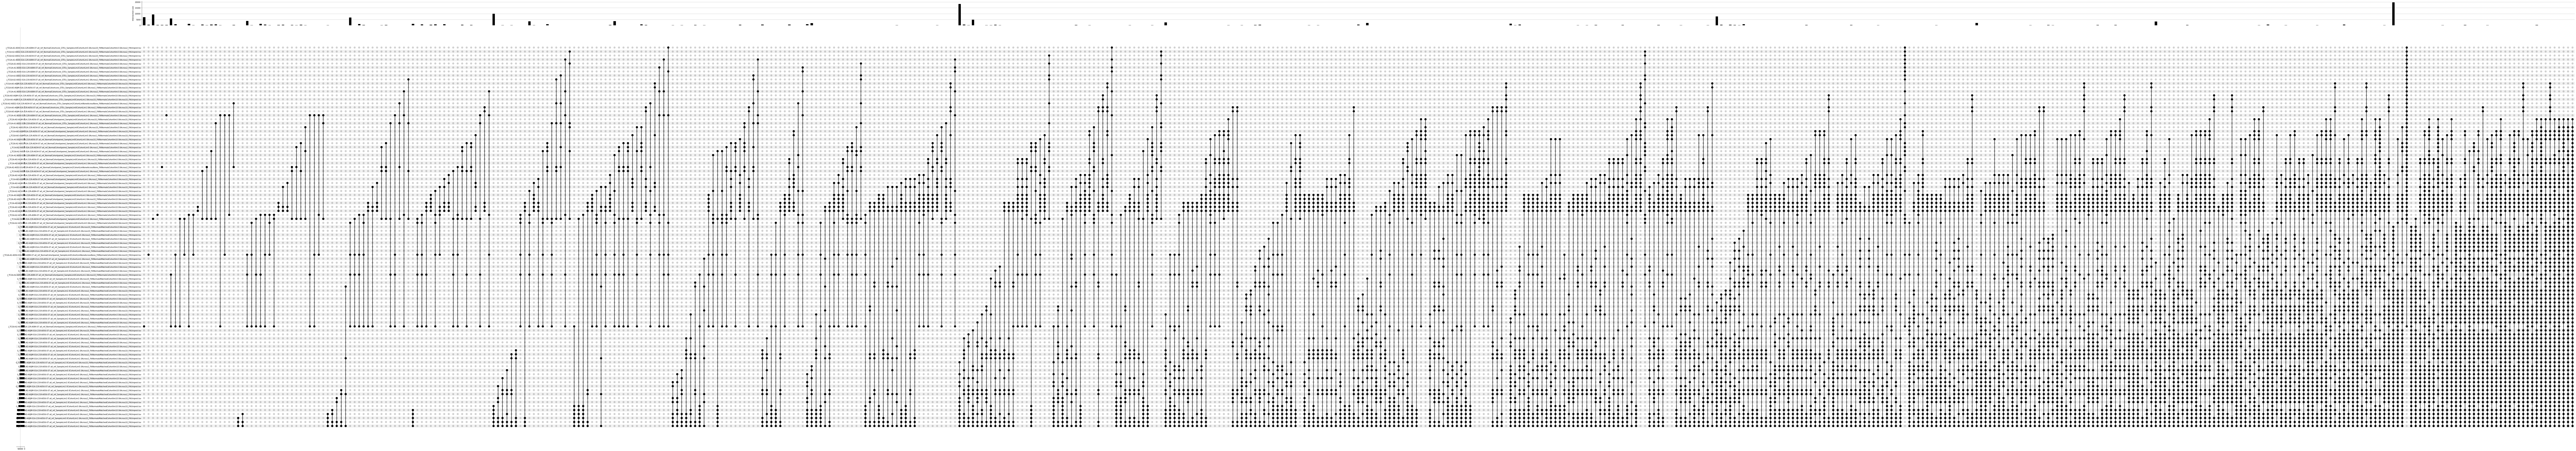

In [130]:
upsetplot.plot(test_plot, sort_by='degree')

In [122]:
from upsetplot import from_contents
contents = {'cat1': ['a', 'b', 'c'],
'cat2': ['b', 'd'],
'cat3': ['e']}
foo = from_contents(contents)

{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:ylabel='Intersection size'>}

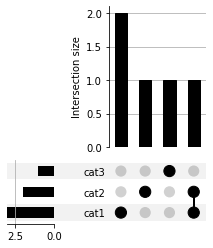

In [123]:
 upsetplot.plot(foo, sort_by='degree')

In [255]:
top_bottom = [text.get_text() for text in plotted['matrix'].properties()['ymajorticklabels']][::-1]

# Legend


In [261]:
def path_to_condition(all_paths):

    sample_expr = [np.float(os.path.basename(path).split('ref_SampleLim')[1].split('Cohort')[0]) 
                   for path in all_paths ]

    foreground_cohort_expr = [np.float(os.path.basename(path).split('CohortLim')[1].split('Across')[0])
                                       for path in all_paths ]

    foreground_cohort_samples = [np.int(os.path.basename(path).split('Across')[1].split('_Filt')[0] ) 
                                 for path in all_paths ]

    background_cohort_expr = [np.float(os.path.basename(path).split('Cohortlim')[1].split('Across')[0])
                              for path in all_paths ]

    background_cohort_samples = [np.int(os.path.basename(path).split('Across')[2].split('_FiltUn')[0])
                                 for path in all_paths ]
    background_cohort_id = [os.path.basename(path).split('Normals')[1].split('lim')[0] for path in all_paths ]

    legend_quant = pd.DataFrame({'sample_expr':sample_expr, 
                  'foreground_cohort_expr': foreground_cohort_expr, 
                  'foreground_cohort_samples': foreground_cohort_samples, 
                  'background_cohort_expr': background_cohort_expr,
                  'background_cohort_samples' : background_cohort_samples, 
                    'background_cohort_id':background_cohort_id})


    sort_legend = False
    if sort_legend:
        legend_quant = legend_quant.sort_values("background_cohort_samples", ascending=False).\
        sort_values("background_cohort_expr", ascending=False).\
        sort_values("foreground_cohort_samples", ascending=False).\
        sort_values("foreground_cohort_expr", ascending=False).\
        sort_values("sample_expr", ascending=False)
    return legend_quant

In [262]:
def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)


# y = legend_quant["background_cohort_samples"]
# x = legend_quant["index"]
# sns.barplot(y, x, palette=colors_from_values(y, "YlOrRd"), orient="h")

In [305]:
def plot_legend(y1, y2, y3, y4, y5, y6, x, save_path=None, save=False):
    #sns.set(style="white", context="talk")  
    sns.set_style("white")
    #, {
    #     "ytick.major.size": 0.1,
    #     "ytick.minor.size": 0.05,
    #     'grid.linestyle': '--', 
    #         "xtick.major.size": 0.1,
    #     "xtick.minor.size": 0.05,
    #     'grid.linestyle': '--'
    #  })
    rs = np.random.RandomState(8)  
    min_axes = -0.5
    y_label_size = 35
    # Set up the matplotlib figure  
    f, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, figsize=(16,10))#sharey=True)  


    sns.barplot(x=y1, y=x, palette=colors_from_values(y1, "YlOrRd"), ax=ax1, orient="h")  
    #ax1.axhline(0, color="k", clip_on=True)  
    #ax1.yaxis.set_minor_locator(ticker.MultipleLocator(1))
    ax1.set_xlim([min_axes, max(y1)])
    ax1.set_ylabel(y1.name, fontsize=y_label_size) 


    sns.barplot(x=y2, y=x, palette=colors_from_values(y2, "vlag"), ax=ax2, orient="h", linewidth=1)  
    #ax2.axhline(0, color="k", clip_on=False)  
    ax2.set_xlim([min_axes, max(y2)])
    ax2.set_ylabel(y2.name, fontsize=y_label_size) 


    sns.barplot(x=y3, y=x, palette=colors_from_values(y3, "deep"), ax=ax3, orient="h")
    #ax3.axhline(0, color="k", clip_on=False)  
    ax3.set_xlim([min_axes, max(y3)])
    ax3.set_ylabel(y3.name, fontsize=y_label_size) 

    sns.barplot(x=y4, y=x, palette=colors_from_values(y4, "turbo"), ax=ax4, orient="h")
    #ax4.axhline(0, color="k", clip_on=False)  
    ax4.set_xlim([min_axes, max(y4)])
    ax4.set_ylabel(y4.name, fontsize=y_label_size) 

    sns.barplot(x=y5, y=x, palette=colors_from_values(y5, "Accent"), ax=ax5, orient="h")
    #ax5.axhline(0, color="k", clip_on=False)  
    ax5.set_xlim([min_axes, max(y5)])
    ax5.set_ylabel(y5.name, fontsize=y_label_size) 

    sns.scatterplot(x=np.ones(legend_quant.shape[0]), y=x, ax=ax6, hue=y6)
    #ax6.axhline(0, color="k", clip_on=False)  
    #ax.legend(ax6.get_legend(),loc='lower right' ) 
    ax6.legend(loc='center left', bbox_to_anchor=(1,0))
    ax6.set_ylabel(y6.name, fontsize=y_label_size) 

    # Finalize the plot  
    sns.despine(bottom=True)  
    plt.setp(f.axes, yticks=[], xlabel='')  
    plt.tight_layout(h_pad=1) 

    if save:
        print("save to {}".format(save_path))
        plt.savefig(save_path, bbox_inches='tight', dpi = 300)
    plt.show()

In [306]:
legend_quant = path_to_condition(top_bottom)

In [307]:
#Prepare Plot
y1, y2, y3, y4, y5, y6 = [legend_quant[col] for col in legend_quant.columns]
legend_quant['index'] = np.arange(legend_quant.shape[0])
x = legend_quant['index'] 

save to /cluster/work/grlab/projects/projects2020_OHSU/plots/upset_plots/v2_v2.5f0752a_conf2_BRCA_TCGA-AO-A0JM-01A-21R-A056-07legend_mini.png


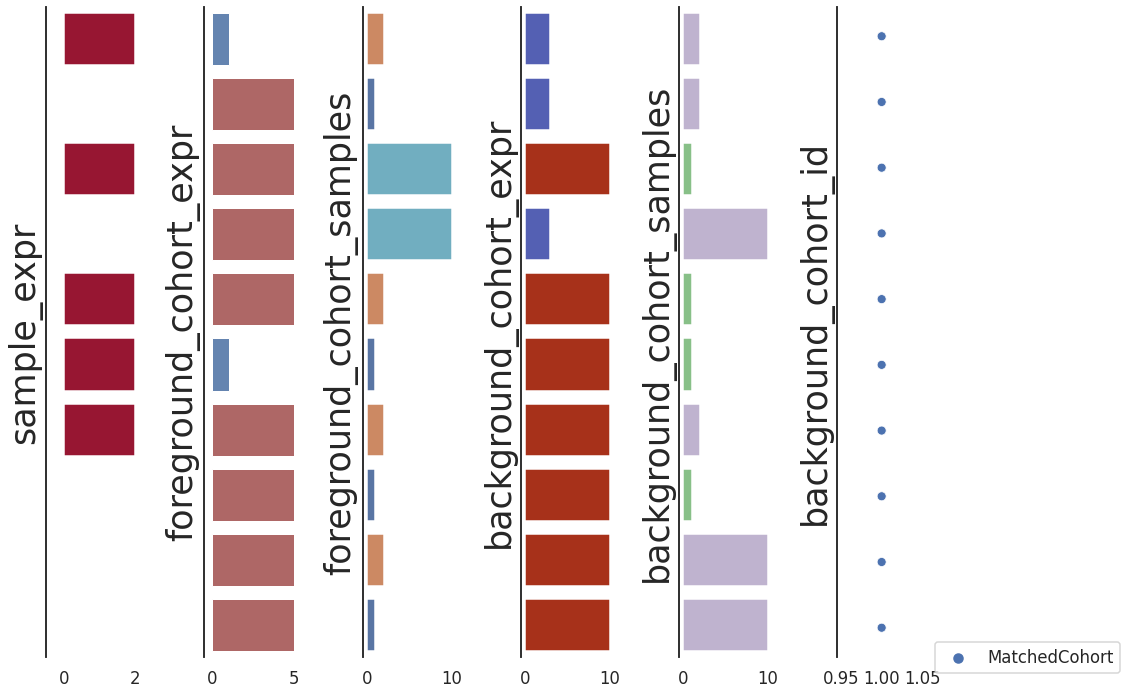

In [314]:
save = True
save_path = os.path.join(plot_dir, base_plot + 'legend' + '_mini' + '.png')
plot_legend(y1, y2, y3, y4, y5, y6, x, save_path, save)